In [340]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de Datos

In [341]:
# obtener el conjunto de datos
df = pd.read_csv('data.csv')

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [343]:
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


<Axes: xlabel='Heart Attack Risk'>

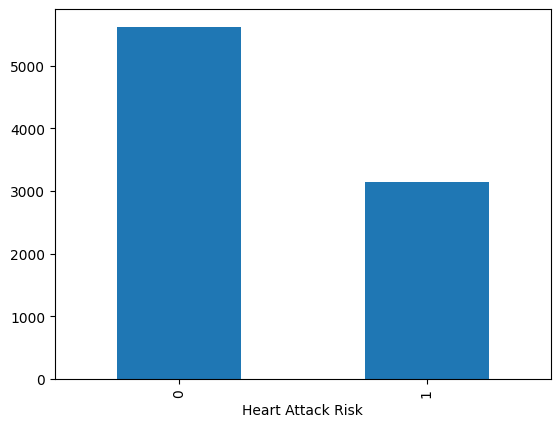

In [344]:
# see if the data is balance in a plot
df["Heart Attack Risk"].value_counts().plot(kind='bar')

In [345]:
# # Balance the data
# df = df.sample(frac=1)
# df_0 = df.loc[df['Heart Attack Risk'] == 0][:3000]
# df_1 = df.loc[df['Heart Attack Risk'] == 1]
# df = pd.concat([df_0, df_1])
# df = df.sample(frac=1, random_state=42)
# df.head()


In [346]:
# Verify if there are any null values
print(df.isna().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [347]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [348]:
df.Diet

0         Average
1       Unhealthy
2         Healthy
3         Average
4       Unhealthy
          ...    
8758      Healthy
8759      Healthy
8760      Average
8761    Unhealthy
8762      Healthy
Name: Diet, Length: 8763, dtype: object

## Transformación de Datos


In [349]:
def cate_pressure(df):
    if df["Systolic Pressure"] < 80 or df["Diastolic Pressure"] < 60 :
        return 0
    elif (df["Systolic Pressure"] >= 80 and df["Systolic Pressure"] <= 120) and (df["Diastolic Pressure"] >= 60 and df["Diastolic Pressure"] <= 80):
        return 1
    elif (df["Systolic Pressure"] > 120 and df["Systolic Pressure"] <= 129 ) and (df["Diastolic Pressure"] >= 60 and df["Diastolic Pressure"] <= 80):
        return 2
    elif (df["Systolic Pressure"] >= 130 and df["Systolic Pressure"] <= 139 ) or (df["Diastolic Pressure"] >= 80 and df["Diastolic Pressure"] <= 89):
        return 3
    elif (df["Systolic Pressure"] >= 140) or (df["Diastolic Pressure"] >= 90):
        return 4

In [350]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#  ---------------------> CREAR COLUMNAS <---------------------

# Calcular la Frecuencia Cardíaca Máxima (FCM) usando la fórmula de Tanaka
df["FCM"] = 208 - (0.7 * df["Age"])

# Categorización del IMC
bins = [
    -1,
    18.5,
    24.9,
    29.9,
    100,
]  # Rangos para bajo peso, peso normal, sobrepeso y obeso
labels = [0, 1, 2, 3]
df["IMC"] = pd.cut(df["BMI"], bins=bins, labels=labels)

# Categorización de la Edad
age_bins = [-1, 18, 40, 100]  # Rangos para jóvenes, adultos y ancianos
age_labels = [0, 1, 2]
df["Age"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

# Frecuencia de Actividad Física
df["Physical_Activity_Frequency"] = pd.cut(
    df["Physical Activity Days Per Week"], bins=[-1, 2, 4, 10], labels=[0, 1, 2]
)

# Categorización del Hábito de Sueño
df["Sleep_Habit"] = pd.cut(
    df["Sleep Hours Per Day"], bins=[-1, 6, 9, 24], labels=[0, 1, 2]
)

# Razón Colesterol/Triglicéridos
df["Chol_Triglycerides_Ratio"] = df["Cholesterol"] / df["Triglycerides"]


# Índice de Riesgo de Estilo de Vida
df["Lifestyle_Risk_Index"] = (
    df["Smoking"]
    + df["Alcohol Consumption"]
    + df["Exercise Hours Per Week"]
    + df["Sedentary Hours Per Day"]
)

# ---------------------> LIMPIAR DATA / TRANSFORMAR DATA <---------------------

# Dividir la columna 'Blood Pressure' en dos columnas separadas
df[["Systolic Pressure", "Diastolic Pressure"]] = df["Blood Pressure"].str.split(
    "/", expand=True
)
df["Systolic Pressure"] = df["Systolic Pressure"].astype("int64")
df["Diastolic Pressure"] = df["Diastolic Pressure"].astype("int64")
df["PAM"] = (2 / 3 * df["Diastolic Pressure"]) + (
    1 / 3 * df["Systolic Pressure"]
)  # Calcular la Presión Arterial Media (PAM)
df["Categoric Pressure"] = df.apply(
    cate_pressure, axis=1
)  # Categorizar la Presión Arterial Media (PAM)

# Crear una columna con la razón Colesterol/IMC
df["Chol_BMI_ratio"] = df.apply(lambda r: float(r["Cholesterol"] / r["BMI"]), axis=1)

# ---------------------> DROP DATA <---------------------

df.drop(
    columns=[
        "Patient ID",
        "Family History",
        "Obesity",
        "Diet",
        "Blood Pressure",
        "Cholesterol",
        "BMI",
        "Smoking",
        "Alcohol Consumption",
        "Exercise Hours Per Week",
        "Sedentary Hours Per Day",
        "Triglycerides",
        "Sleep Hours Per Day",
        "Physical Activity Days Per Week",
        "Income",
        "Country",
        "Continent",
        "Hemisphere",
    ],
    inplace=True,
)

# ---------------------> NORMALIZE DATA <---------------------

# Convertir las columnas a valores numéricos
le = LabelEncoder()
scaler = StandardScaler()

for columns in df.columns:
    if df[columns].dtype == "object":
        df[columns] = le.fit_transform(df[columns])
    elif df[columns].dtype == "float64":
        # to range of 0 to 1
        df[columns] = scaler.fit_transform(df[columns].values.reshape(-1, 1))

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          8763 non-null   category
 1   Sex                          8763 non-null   int32   
 2   Heart Rate                   8763 non-null   int64   
 3   Diabetes                     8763 non-null   int64   
 4   Previous Heart Problems      8763 non-null   int64   
 5   Medication Use               8763 non-null   int64   
 6   Stress Level                 8763 non-null   int64   
 7   Heart Attack Risk            8763 non-null   int64   
 8   FCM                          8763 non-null   float64 
 9   IMC                          8763 non-null   category
 10  Physical_Activity_Frequency  8763 non-null   category
 11  Sleep_Habit                  8763 non-null   category
 12  Chol_Triglycerides_Ratio     8763 non-null   float64 
 13  Lif

In [352]:
df.head()

,Age,Sex,Heart Rate,Diabetes,Previous Heart Problems,Medication Use,Stress Level,Heart Attack Risk,FCM,IMC,Physical_Activity_Frequency,Sleep_Habit,Chol_Triglycerides_Ratio,Lifestyle_Risk_Index,Systolic Pressure,Diastolic Pressure,PAM,Categoric Pressure,Chol_BMI_ratio
0,2,1,72,0,0,0,9,0,-0.625557,3,0,0,-0.277489,-0.842503,158,88,0.720642,3,-0.754703
1,1,1,98,1,1,0,1,0,1.539322,2,0,1,0.404961,-1.285354,165,93,1.148815,4,1.309532
2,1,0,72,1,1,1,9,0,1.539322,2,1,0,-0.406408,-0.878062,174,99,1.677733,4,0.552432
3,2,1,73,1,1,0,9,0,-1.425621,3,1,0,-0.067209,0.290798,163,100,1.451054,4,0.283725
4,2,1,93,1,1,0,6,0,-0.578495,1,0,0,0.200019,-1.352754,91,88,-0.966861,3,1.384272


In [353]:
def show_correlation(column, df, cols=2):
    rows = len(df.columns) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    j = 0
    for i, col in enumerate(df.columns):
        if i == rows:
            j = 1
        i = i % rows
        x = df[column]
        y = df[col]
        slope, intercept = np.polyfit(x, y, 1)
        var = np.array([min(x), max(x)])
        regression_line = slope * var + intercept

        axes[i, j].scatter(x, y)
        axes[i, j].plot(var, regression_line, color="red")
        axes[i, j].set_xlabel(column)
        axes[i, j].set_ylabel(col)
        axes[i, j].set_title(f"{column} vs {col}")
    plt.tight_layout()
    plt.show()

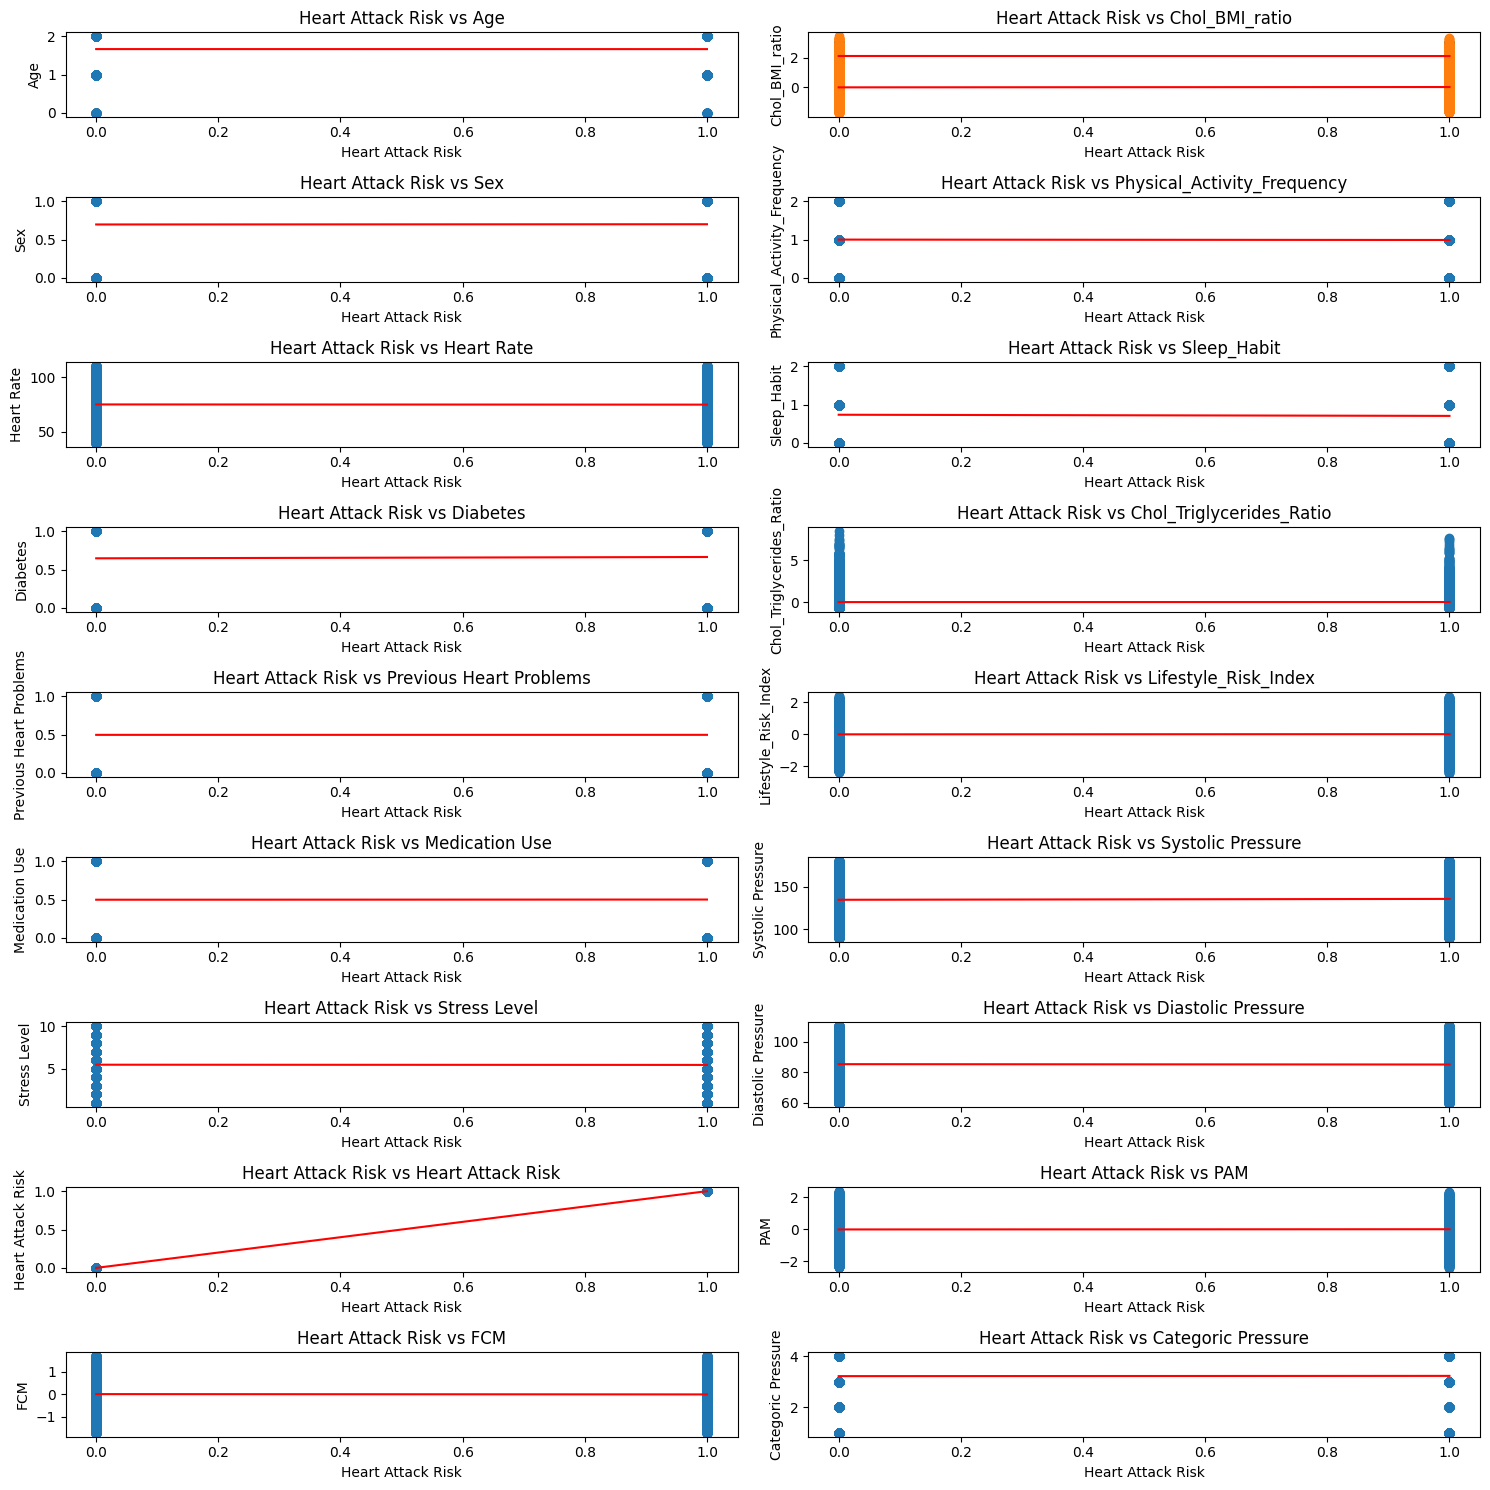

In [354]:
show_correlation("Heart Attack Risk", df)

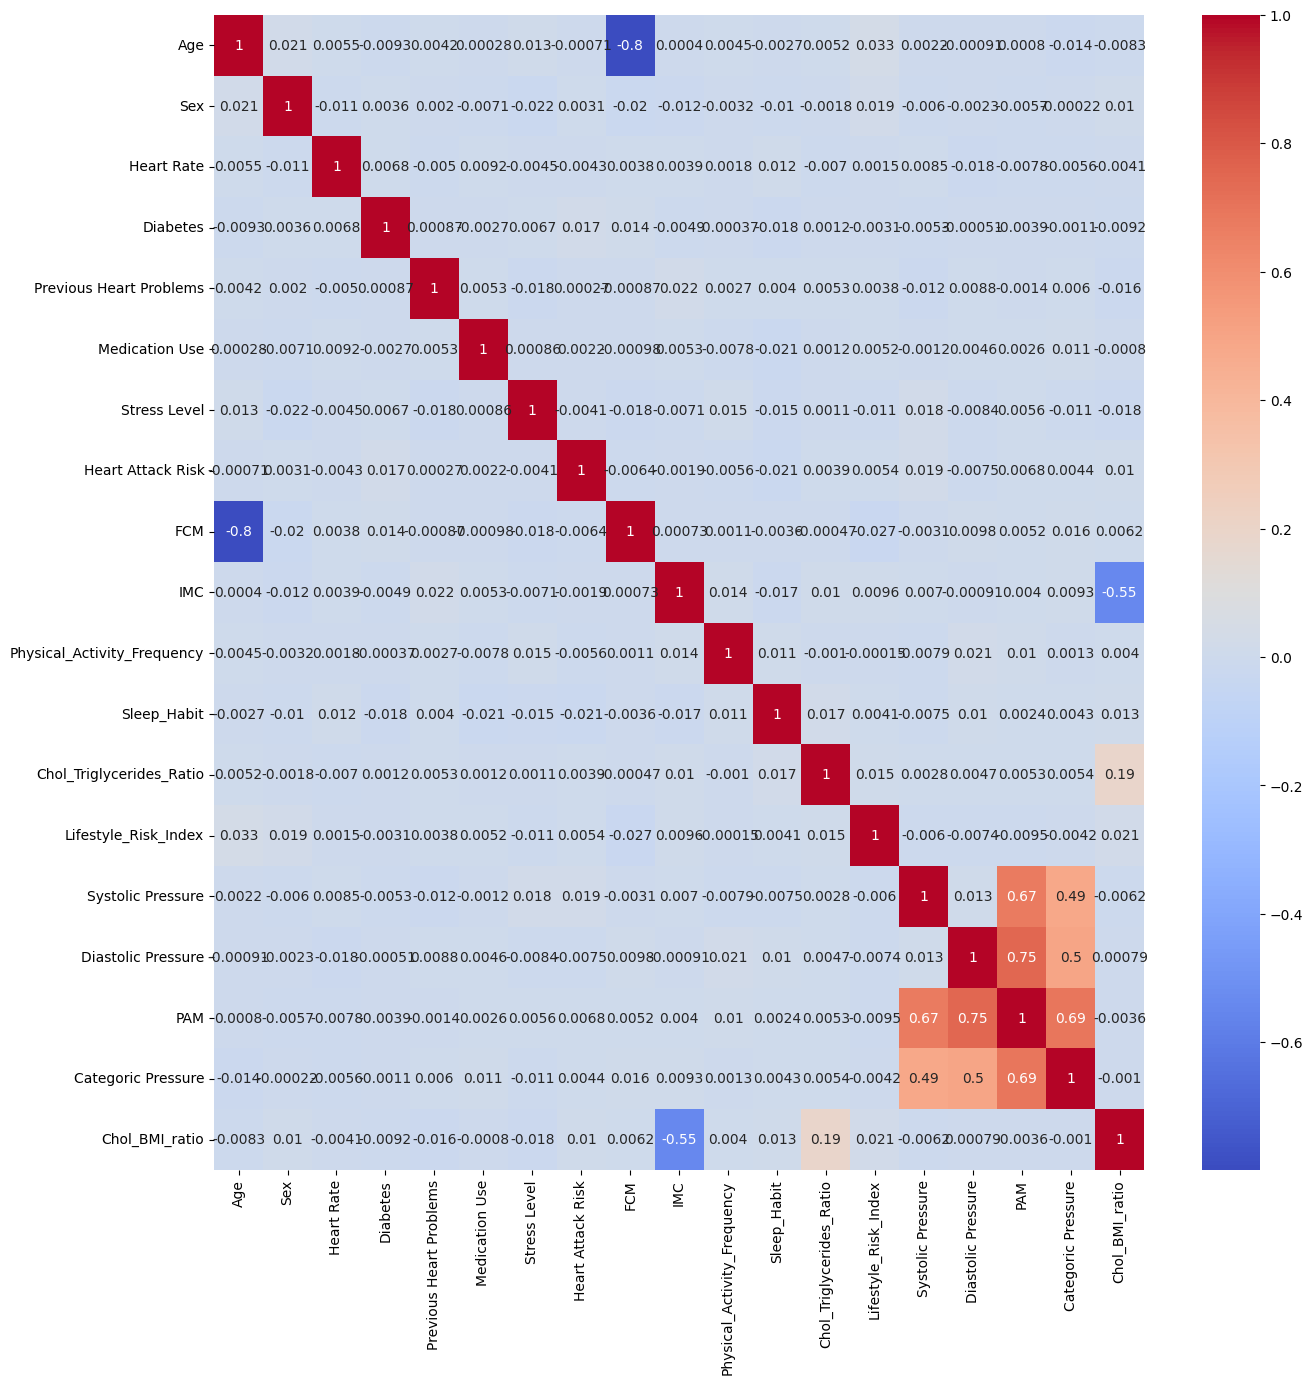

In [355]:
# graph of the corr
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Modelate

In [356]:
df.head()

,Age,Sex,Heart Rate,Diabetes,Previous Heart Problems,Medication Use,Stress Level,Heart Attack Risk,FCM,IMC,Physical_Activity_Frequency,Sleep_Habit,Chol_Triglycerides_Ratio,Lifestyle_Risk_Index,Systolic Pressure,Diastolic Pressure,PAM,Categoric Pressure,Chol_BMI_ratio
0,2,1,72,0,0,0,9,0,-0.625557,3,0,0,-0.277489,-0.842503,158,88,0.720642,3,-0.754703
1,1,1,98,1,1,0,1,0,1.539322,2,0,1,0.404961,-1.285354,165,93,1.148815,4,1.309532
2,1,0,72,1,1,1,9,0,1.539322,2,1,0,-0.406408,-0.878062,174,99,1.677733,4,0.552432
3,2,1,73,1,1,0,9,0,-1.425621,3,1,0,-0.067209,0.290798,163,100,1.451054,4,0.283725
4,2,1,93,1,1,0,6,0,-0.578495,1,0,0,0.200019,-1.352754,91,88,-0.966861,3,1.384272


## Split Data

In [357]:
# Split the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)


X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Heart Attack Risk", axis=1),
    df["Heart Attack Risk"],
    random_state=42,
    test_size=0.2,
    shuffle=True,
)

In [358]:
# Eliminamos el Id del pasajero en el conjunto de datos de prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7010, 18), (1753, 18), (7010,), (1753,))

## Model Perceptron


In [359]:
from sklearn.linear_model import Perceptron

In [360]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
predictions = perceptron.predict(X_test)
# Calculate his accuracy of the perceptron
acc_perceptron = accuracy_score(y_test, predictions)
# Print the accuracy
print(acc_perceptron)

0.6417569880205363


## Model Naive Bayes

In [361]:
from sklearn.naive_bayes import GaussianNB

In [362]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# print accuracy
acc_gnb =accuracy_score(y_test, y_pred)
print(acc_gnb)

0.6417569880205363


## Model Regresion Logistic

In [363]:
from sklearn.linear_model import LogisticRegression, SGDClassifier


### SGDClassifier

In [364]:
logistic_model_SGD = SGDClassifier(loss='log_loss',learning_rate='constant',eta0=0.1 ) # investicar los parámetros en la documentacion y variar el learning_rate
logistic_model_SGD.fit(X_train, y_train)

SGDClassifier(eta0=0.1, learning_rate='constant', loss='log_loss')

In [365]:
print(f'Clases de la variable dependiente: {logistic_model_SGD.classes_}')
print('\n')
print('Vectores de coeficientes:')
print(logistic_model_SGD.coef_)

Clases de la variable dependiente: [0 1]


Vectores de coeficientes:
[[  2.82824162   7.34854295   0.60606954  16.70525975 -10.79928725
    5.79912257 -14.31886006 -17.81841588  15.44688289   1.37833641
  -19.67516824  -4.82166644  17.77714564  11.78492043   5.4910193
   -1.91965914  -3.18417349  15.5530509 ]]


In [366]:
y_pred = logistic_model_SGD.predict(X_train)

Accuracy entrenamiento: 0.35820256776034237
Matriz de confusión:


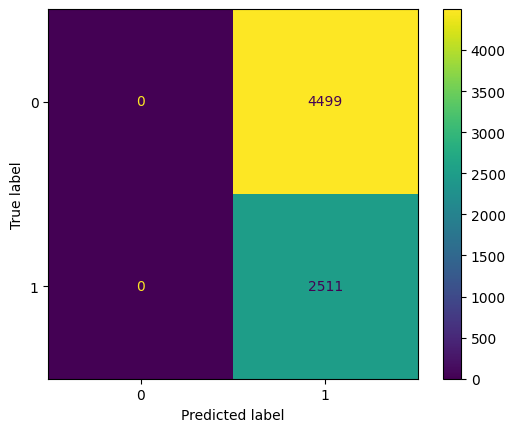

In [367]:
print(f'Accuracy entrenamiento: {accuracy_score(y_train, y_pred)}')
print('Matriz de confusión:')
matriz_confusion = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=logistic_model_SGD.classes_)
disp.plot()
plt.show()

In [368]:
y_pred_test = logistic_model_SGD.predict(X_test)

Accuracy testing: 0.3582430119794638
Matriz de confusión:


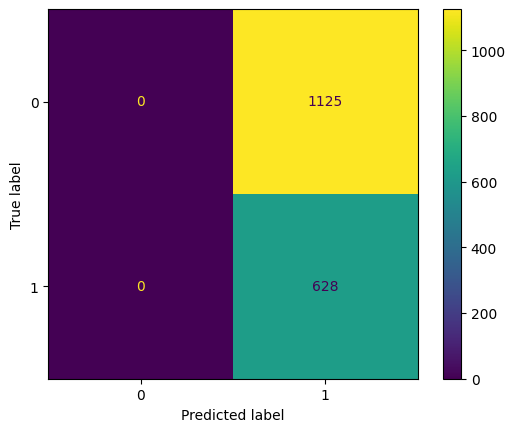

In [369]:
print(f'Accuracy testing: {accuracy_score(y_test, y_pred_test)}')
print('Matriz de confusión:')
matriz_confusion_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_test, display_labels=logistic_model_SGD.classes_)
disp.plot()
plt.show()

### LogisticRegression

In [370]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

d:\Codes\PC3-IA\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [371]:
print(f'Clases de la variable dependiente: {logistic_model.classes_}')
print('\n')
print('Vectores de coeficientes:')
print(logistic_model.coef_)

Clases de la variable dependiente: [0 1]


Vectores de coeficientes:
[[-0.05910064  0.01348278 -0.00044644  0.08000574 -0.02032724  0.0099031
  -0.00947778 -0.04338801  0.05197947 -0.01647525 -0.04793777 -0.01273247
   0.0198813  -0.00070285 -0.004745    0.08690863 -0.00146814  0.04427555]]


In [372]:
y_pred_2 = logistic_model.predict(X_train)

Accuracy entrenamiento: 0.6417974322396577
Matriz de confusión:


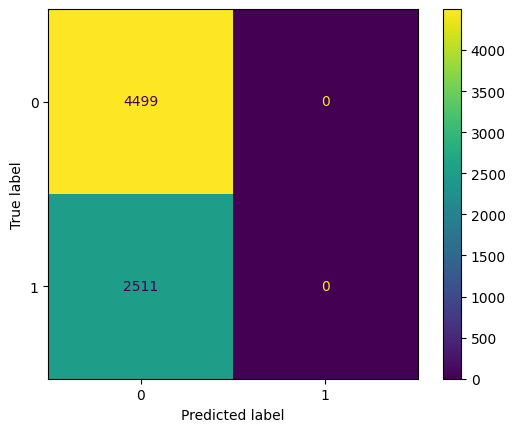

In [373]:
print(f'Accuracy entrenamiento: {accuracy_score(y_train, y_pred_2)}')
print('Matriz de confusión:')
matriz_confusion_2 = confusion_matrix(y_train, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_2, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

In [374]:
y_pred_test_2 = logistic_model.predict(X_test)

Accuracy testing: 0.6417569880205363
Matriz de confusión:


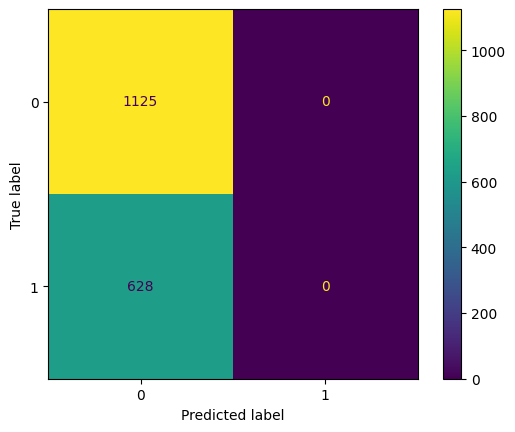

In [375]:
print(f'Accuracy testing: {accuracy_score(y_test, y_pred_test_2)}')
print('Matriz de confusión:')
matriz_confusion_test_2 = confusion_matrix(y_test, y_pred_test_2)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_test_2, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

### ANN

In [376]:
# Use network neural
from keras.models import Sequential
from keras.layers import Dense, Input

In [377]:
## Con sequetial podemos construir una red neuronal apilando capas
modelsequ = Sequential()
modelsequ.add(Input(shape=(X_train.shape[1],)))
modelsequ.add(Dense(15, activation='elu'))
modelsequ.add(Dense(10, activation='elu'))
modelsequ.add(Dense(1, activation='sigmoid'))
modelsequ.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
modelsequ.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_29 (Dense)            (None, 15)                285       
                                                                 
 dense_30 (Dense)            (None, 10)                160       
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 456 (1.78 KB)
Trainable params: 456 (1.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [378]:
historyseq = modelsequ.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=128,
    workers=4,
)

Epoch 1/500
55/55 [==============================] - 1s 6ms/step - loss: 5.8269 - accuracy: 0.5621 - val_loss: 2.4463 - val_accuracy: 0.5168
Epoch 2/500
55/55 [==============================] - 0s 3ms/step - loss: 1.6759 - accuracy: 0.5367 - val_loss: 1.1988 - val_accuracy: 0.5168
Epoch 3/500
55/55 [==============================] - 0s 5ms/step - loss: 0.9794 - accuracy: 0.5521 - val_loss: 0.8400 - val_accuracy: 0.5528
Epoch 4/500
55/55 [==============================] - 0s 5ms/step - loss: 0.7896 - accuracy: 0.5638 - val_loss: 0.7641 - val_accuracy: 0.5568
Epoch 5/500
55/55 [==============================] - 0s 3ms/step - loss: 0.7355 - accuracy: 0.5775 - val_loss: 0.7245 - val_accuracy: 0.5921
Epoch 6/500
55/55 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5867 - val_loss: 0.7184 - val_accuracy: 0.6332
Epoch 7/500
55/55 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5964 - val_loss: 0.6815 - val_accuracy: 0.6212
Epoch 8/500
5

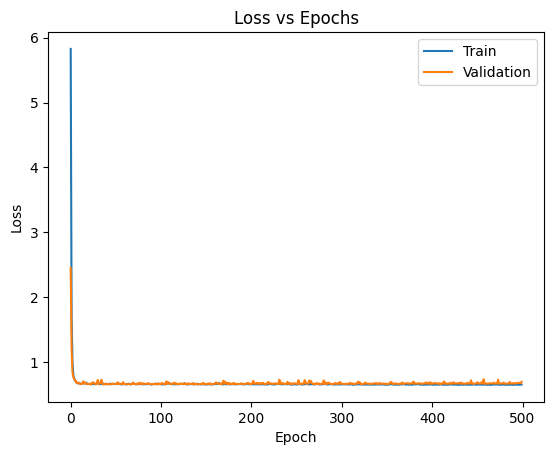

In [379]:
# graph of loss 
plt.plot(historyseq.history['loss'])
plt.plot(historyseq.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### CNN

In [380]:
# Import lib for convolutional neural network
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

In [381]:
X_train.shape

(7010, 18)

In [382]:
modelconv = Sequential()
# modelconv.add(tf.keras.Input(shape=(10,)))
modelconv.add(Conv1D(32, 3, activation="relu", input_shape=(X_train.shape[1], 1)))
modelconv.add(MaxPooling1D())
modelconv.add(Conv1D(64, 3, activation="relu"))
modelconv.add(MaxPooling1D())
modelconv.add(Flatten())
modelconv.add(Dense(64, activation="relu"))
modelconv.add(Dropout(0.5))
modelconv.add(Dense(1, activation="sigmoid"))
modelconv.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
modelconv.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 16, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_32 (Dense)            (None, 64)              

In [383]:
# Train the model
historyconv = modelconv.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=16
)

Epoch 1/500
